In [71]:
import pandas as pd #for reading the dataset
import numpy as np #for plotting
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/Jegadit/Customer-Churn-Prediction-Analysis-Using-Ensemble-Techniques/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.shape

(7043, 21)

In [74]:
df.duplicated().sum()

0

In [69]:
df = df.drop_duplicates(subset= None, keep= 'first', inplace= False, ignore_index= False)
df.duplicated().sum()

0

In [70]:
df.shape

(7021, 20)

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# FEATURE ENGINEERING

In [54]:
df.info()

In [59]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

# ENCODING

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
droplist = ['customerID','MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

df1 = df.drop(columns=droplist)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,DSL,Yes,No,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,DSL,Yes,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Fiber optic,No,No,Month-to-month,74.40,306.6,Yes


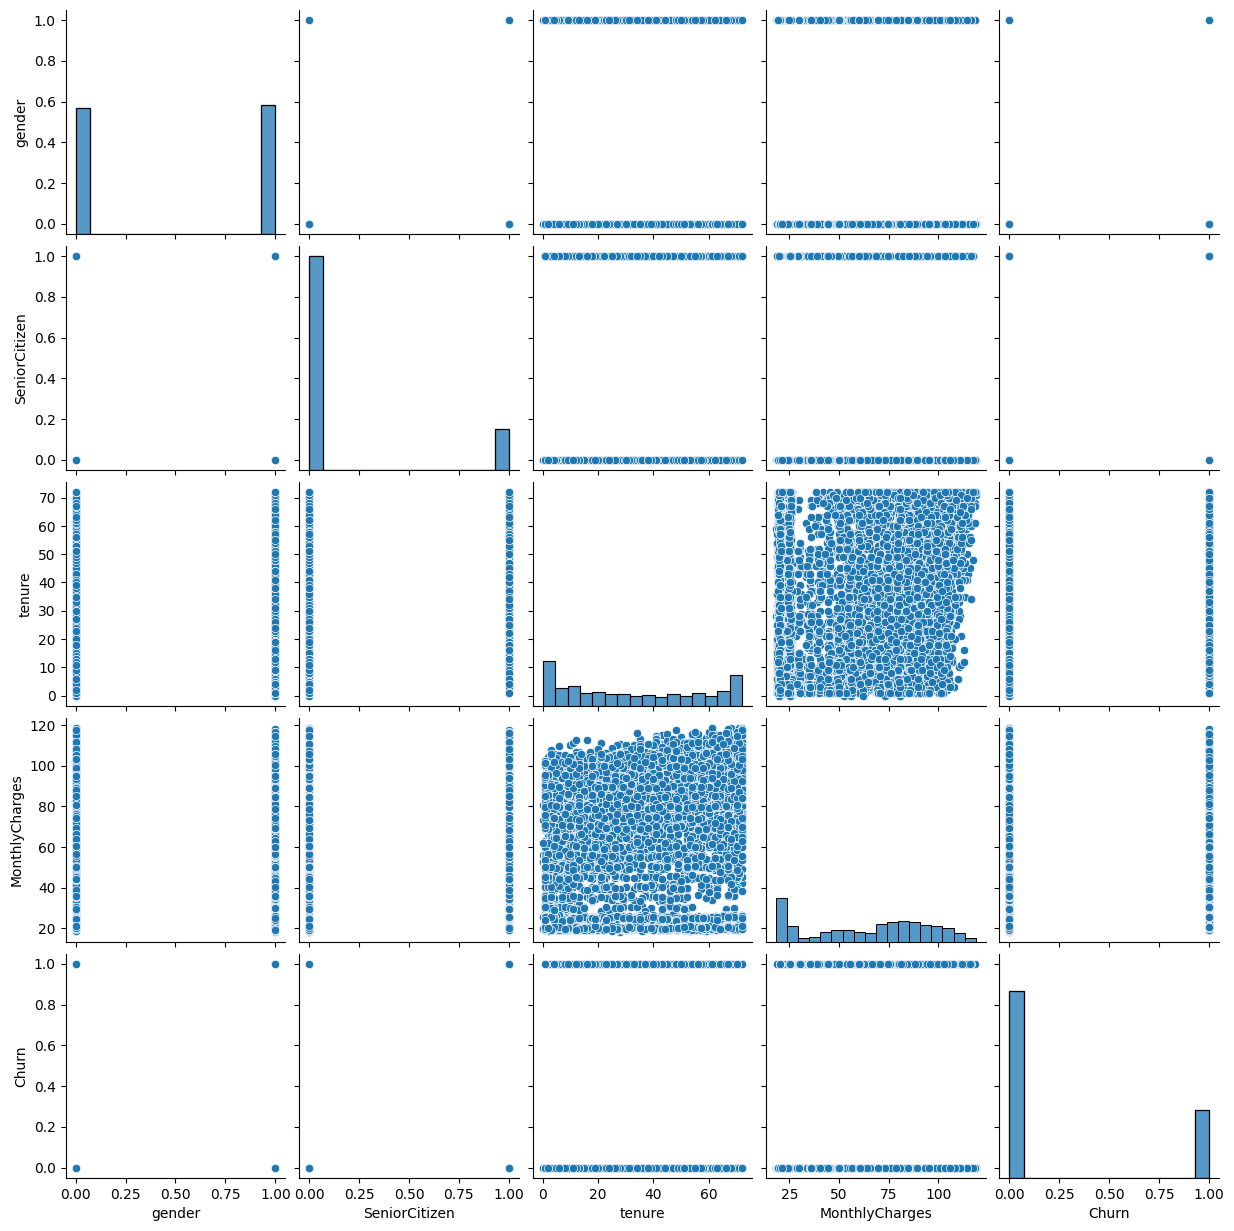

In [61]:
sns.pairplot(df)

In [60]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

C:\Users\girig\AppData\Local\Temp\ipykernel_18208\1286136408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

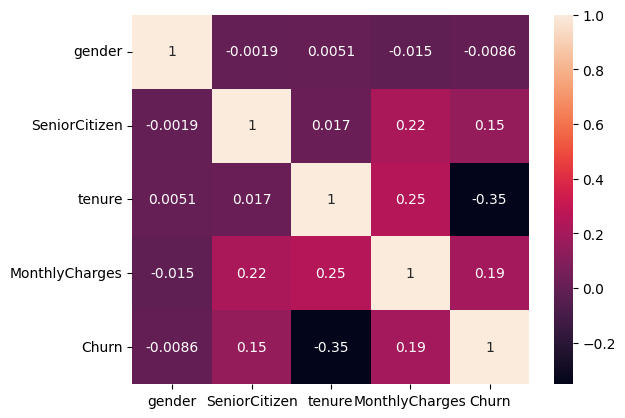

In [62]:
corr=df.corr()
sns.heatmap(corr, annot=True)

# DATA VISUALIZATION

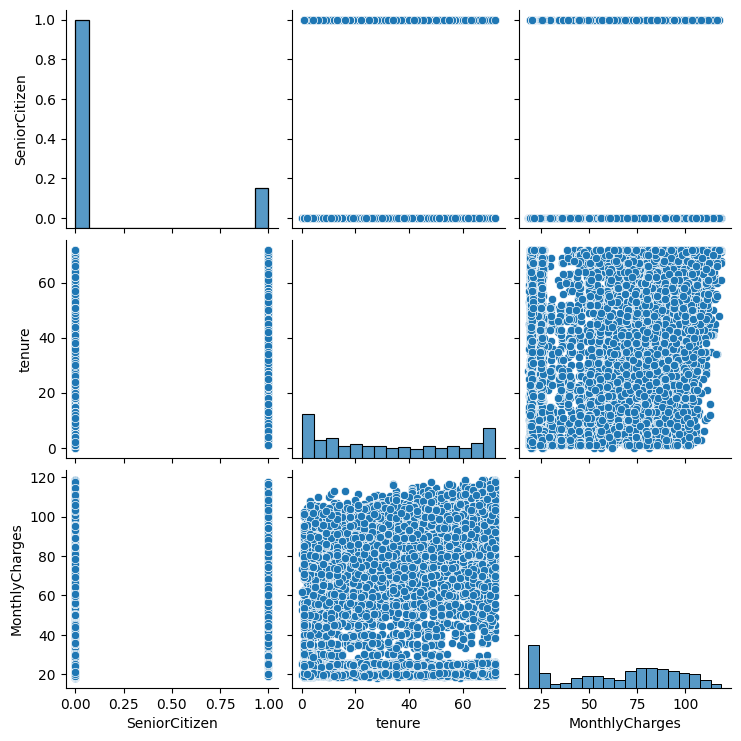

In [ ]:
sns.pairplot(df)

<AxesSubplot: xlabel='tenure', ylabel='MonthlyCharges'>

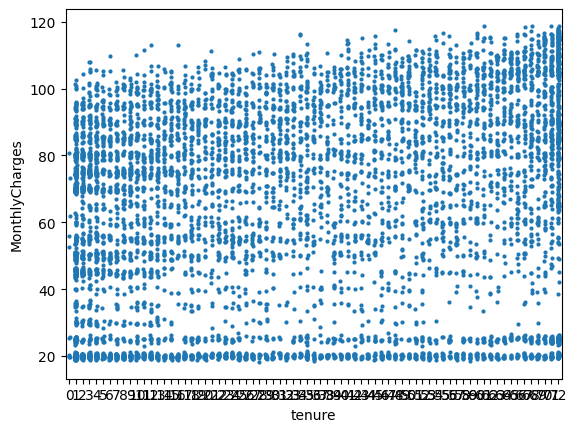

In [ ]:
sns.stripplot(x="tenure", y="MonthlyCharges", data=df, size=3, dodge=True)

C:\Users\girig\AppData\Local\Temp\ipykernel_18208\1286136408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot: >

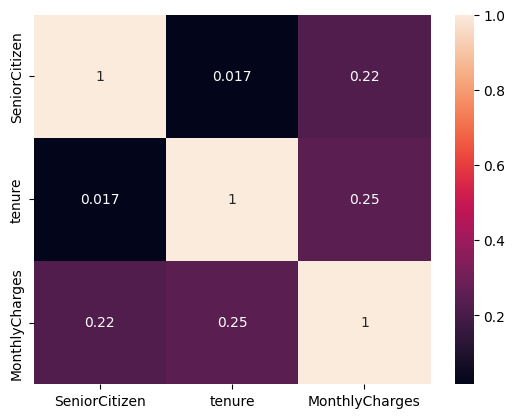

In [ ]:
corr=df.corr()
sns.heatmap(corr, annot=True)